In [ ]:
import pandas as pd
import numpy as np
from numpy import ndarray 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from keras.utils import np_utils
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras import losses 
from keras import optimizers 
from keras import metrics 
from sklearn.utils import shuffle
import os
from google.colab import drive
from keras.models import model_from_json
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/Health predictor/Model_path'
model_name = 'health_state_predictor'

In [ ]:
df = pd.read_csv("generated data.csv", header=None)
df = shuffle(df)

In [ ]:
x = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.8)

In [ ]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
model = tf.keras.models.Sequential() # Initialising the ANN

model.add(Dense(12, input_dim=3, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
    

In [ ]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


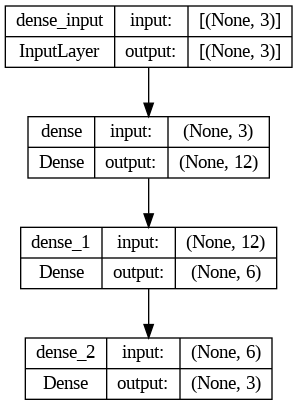

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="img_model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

dot_img_file = (model_path + 'img_cnn_model_' + model_name + '.png')
tf.keras.utils.plot_model(model, to_file = dot_img_file, show_shapes=True)

In [ ]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 300, validation_data = (x_test, y_test))


Epoch 1/300
19/19 [==============================] - 1s 28ms/step - loss: 1.7391 - accuracy: 0.5169 - val_loss: 1.1191 - val_accuracy: 0.5503
Epoch 2/300
19/19 [==============================] - 0s 12ms/step - loss: 0.9023 - accuracy: 0.5863 - val_loss: 0.8455 - val_accuracy: 0.5321
Epoch 3/300
19/19 [==============================] - 0s 11ms/step - loss: 0.8013 - accuracy: 0.6438 - val_loss: 0.7764 - val_accuracy: 0.7069
Epoch 4/300
19/19 [==============================] - 0s 11ms/step - loss: 0.7795 - accuracy: 0.6768 - val_loss: 0.7763 - val_accuracy: 0.6671
Epoch 5/300
19/19 [==============================] - 0s 12ms/step - loss: 0.7780 - accuracy: 0.6760 - val_loss: 0.7853 - val_accuracy: 0.6235
Epoch 6/300
19/19 [==============================] - 0s 21ms/step - loss: 0.7676 - accuracy: 0.6861 - val_loss: 0.7620 - val_accuracy: 0.6741
Epoch 7/300
19/19 [==============================] - 0s 11ms/step - loss: 0.7562 - accuracy: 0.6794 - val_loss: 0.7464 - val_accuracy: 0.7062
Epoch 

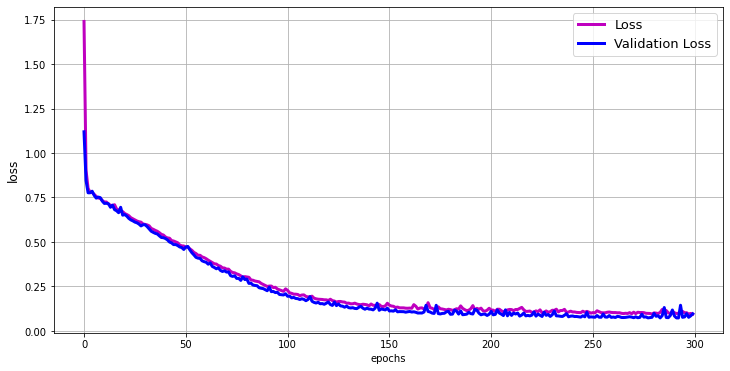

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], 'm', linewidth=3)
plt.plot(history.history['val_loss'], 'b', linewidth=3)
plt.legend(['Loss', 'Validation Loss'], fontsize=13)
plt.xlabel('epochs')
plt.ylabel('loss', fontsize=12)
plt.grid(True)
plt.show()

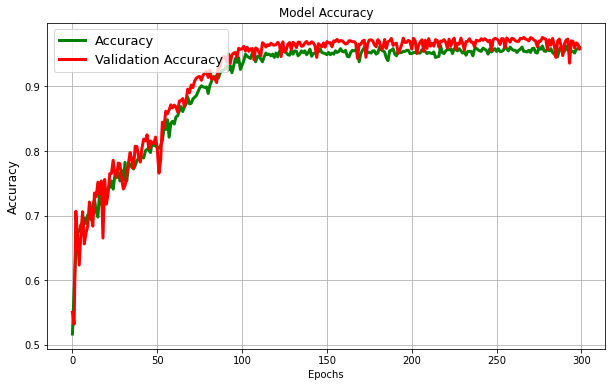

In [ ]:
plt.figure(figsize=(10,6), frameon=True)
plt.plot(history.history['accuracy'], 'g', linewidth=3)
plt.plot(history.history['val_accuracy'], 'r', linewidth=3)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy', fontsize=12)
plt.legend(['Accuracy', 'Validation Accuracy'], loc = 'upper left', fontsize=13)
plt.grid(True)
plt.show()

In [ ]:
model.predict([[80,38,96]])

1/1 [==============================] - 0s 82ms/step


array([[5.048701e-03, 9.945310e-01, 4.203559e-04]], dtype=float32)

In [ ]:
model.save(os.path.join(model_path, (model_name + '.h5')))
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/MyDrive/Colab Notebooks/Health predictor/Model_path 


In [ ]:
model_json = model.to_json()
with open((model_path + model_name + '.json'), "w") as json_file:
    json_file.write(model_json)